# MLDL Project by Hakan Ayranci and Robert Bilger
## 1. Import Packages and data understanding/visualization

In [1]:
from data_and_visualization import *
from mldl_algorithms import *

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC

In [2]:
#Read raw data and create blind test set
raw_data_object = Data("../data/raw/train.csv")

raw_data_object.get_min_max_mean()

No. of empty values: 0
Max value of Dataset: DH69 198163000000.0
Min value of Dataset: T15 -51723.0
Mean value of Dataset: 167097885.98178184


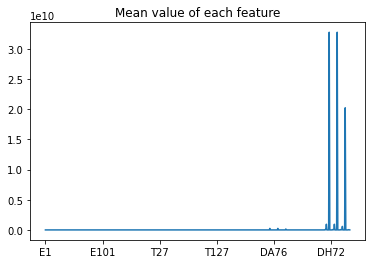

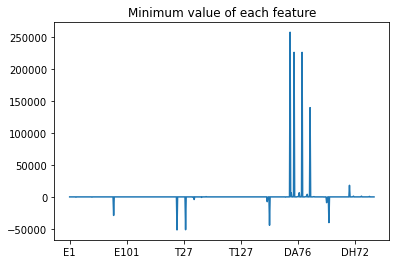

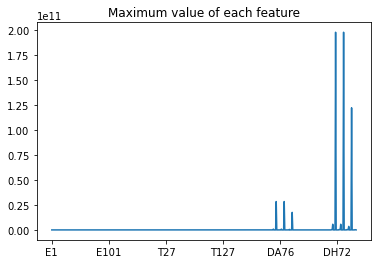

In [3]:
raw_data_object.plot_mean_values()
raw_data_object.plot_min_values()
raw_data_object.plot_max_values()

1    840
2    840
3    840
4    840
Name: class, dtype: int64


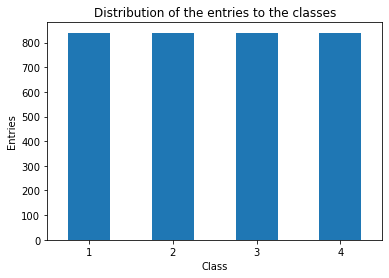

In [4]:
raw_data_object.plot_number_entries_for_class()

class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: E1, dtype: object

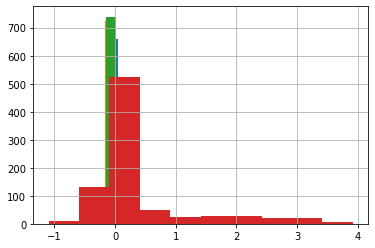

In [5]:
#Example of Histogram for feature E1 divided by classes
raw_data_object.raw_data.groupby("class")["E1"].hist()

#Example of PlotBox for feature E1 divided by classes
#raw_data_object.raw_data.groupby("class")["E1"].plot.box()

In [6]:
#Group the max values for each feature by the classes/labels
print("Max values for features by class")
print(raw_data_object.raw_data.groupby("class").max())

#Group the mean values for each feature by the classes/labels
print("Mean values for features by class")
print(raw_data_object.raw_data.groupby("class").mean())

Max values for features by class
             E1       E2        E3        E4       E5        E6       E7  \
class                                                                      
1      0.417170  2.43505  0.354800  0.213432  5.34709   44.2721  4.59967   
2      0.926043  3.78422  0.994797  2.499670  9.04522  116.3880  4.64364   
3      0.705446  3.64685  0.818780  0.800675  3.90313   41.6337  4.64364   
4      3.920770  3.98512  3.872190  4.544780  1.69174   40.8789  4.64413   

             E8        E9      E10  ...     DH95     DH96          DH97  \
class                               ...                                   
1     -0.070047 -0.017393  2.46567  ...  31.4969  1017.92  1.218930e+11   
2     -0.080614  0.351783  4.58067  ...  31.5009  1018.15  1.219090e+11   
3     -0.078047  0.037783  4.57867  ...  31.4829  1017.32  1.219050e+11   
4      3.557610  3.733610  4.54878  ...  31.5131  1018.63  1.224060e+11   

          DH98     DH99    DH100    DH101    DH102        D

### PCA for unscaled raw data

Initial numbers of features: 533
Reduced numbers of features: 1
DH69 & DH83 & DH96


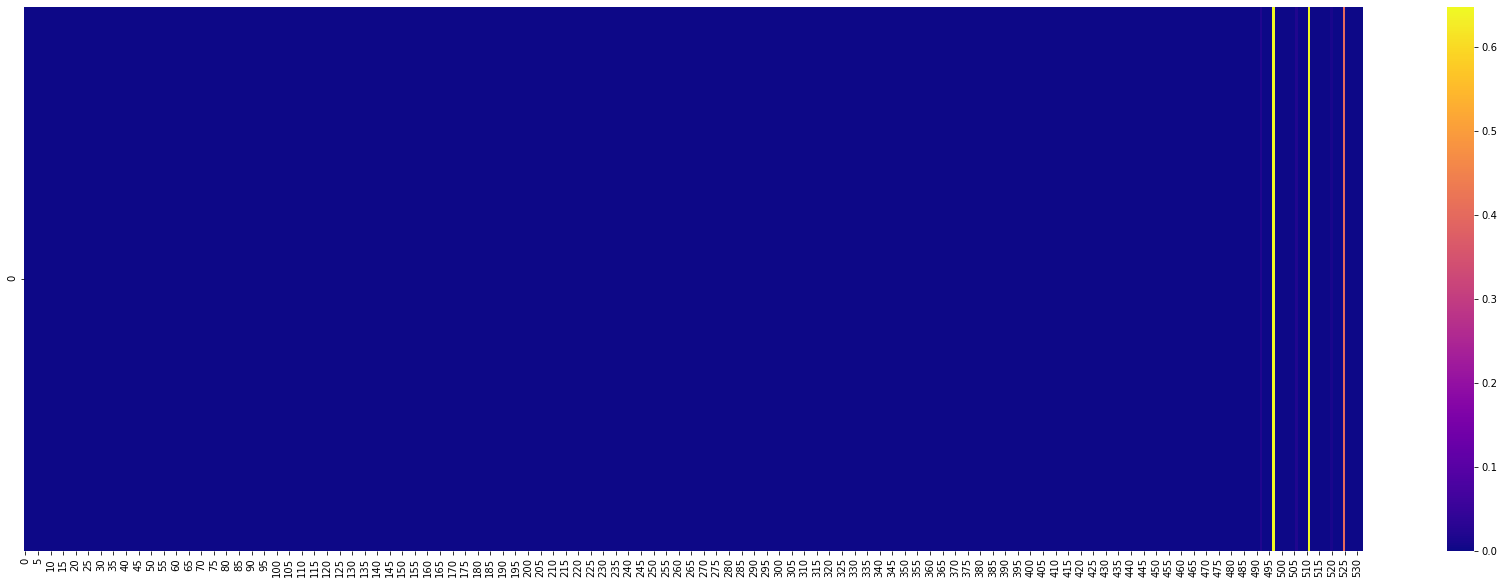

In [7]:
raw_data, raw_features, raw_labels = raw_data_object.get_data_features_labels()
#PCA for reducing features for unscaled data
# Show the no of reducedable features for 99% of variance
pca = PCA(n_components=0.99)
train_data_pca = pca.fit_transform(raw_data)

print("Initial numbers of features:", raw_data.shape[1])
print("Reduced numbers of features:", train_data_pca.shape[1])

#plt.figure(figsize=(10,6))
#plt.scatter(train_data_pca[:,0],train_data_pca[:,0],c=train_labels, cmap='plasma')

#Check which features has more of 99% of variance
#correlation = data.corr().abs()
#sorted_correlation = correlation.unstack().sort_values(kind="quicksort")
#print(sorted_correlation.head())
import seaborn as sns
plt.figure(figsize=(30,10))
sns.heatmap(pca.components_,cmap='plasma',)

#Print the features names of the headmap
print(raw_data.iloc[:, 497].name+" & "+ raw_data.iloc[:, 511].name+" & "+ raw_data.iloc[:, 524].name)

The high correlation comes from the features with the highest values. DH69 has the highest mean!!!
=>  standardization and scaling is necessary

## 2. Preprocessing

### 2.1 Train-Test Split and Scale Data

In [3]:
#raw_data_object = Data("../data/raw/train.csv")
#raw_data_object.create_blind_test_set(no_of_datarecords=10)
train_data_object = Data("../data/processed/train_dataset.csv")
blind_test_data = Data("../data/processed/blind_dataset.csv")

blind_data, blind_featues, blind_labels = blind_test_data.get_data_features_labels()

data, features, labels = train_data_object.get_data_features_labels()

train_data, test_data, train_labels, test_labels = train_test_split(
data, labels, test_size = 0.33, random_state=40)

#Scale Values = StandardScaler/Z-Score
train_data_stscaled = StandardScaler().fit_transform(train_data)
test_data_stscaled = StandardScaler().transform(test_data)

#test_data_stscaled = StandardScaler().fit_transform(test_data)

#Scale Values = Min-Max
train_data_min_max = MinMaxScaler().fit_transform(train_data)
test_data_min_max = MinMaxScaler().transform(test_data)
#test_data_min_max = MinMaxScaler().fit_transform(test_data)

(1010, 533)

In [4]:
pca = PCA(n_components=0.99)
train_data_pca = pca.fit_transform(train_data)

#Transform scaled test data into trained pca
test_data_pca = pca.transform(test_data)

print("Initial numbers of features:", data.shape[1])
print("PCA numbers of features:", train_data_pca.shape[1])

Initial numbers of features: 533
PCA numbers of features: 1


In [36]:
#PCA for reducing features
# Show the no of reducedable features for 99% of variance
pca = PCA(n_components=0.99)
train_data_pca = pca.fit_transform(train_data_stscaled)

#Transform scaled test data into trained pca
test_data_pca = pca.transform(test_data_stscaled)

print("Initial numbers of features:", data.shape[1])
print("PCA numbers of features:", train_data_pca.shape[1])

Initial numbers of features: 533
PCA numbers of features: 101


In [22]:
pca = PCA(n_components=0.99)
train_data_pca = pca.fit_transform(train_data_min_max)

#Transform min max test data into trained pca
test_data_pca = pca.transform(test_data_min_max)

print("Initial numbers of features:", data.shape[1])
print("PCA numbers of features:", train_data_pca.shape[1])

Initial numbers of features: 533
PCA numbers of features: 68


## 3. Decision Tree
### 3.1 For unscaled Data

In [21]:
#Unscaled Data
print("Results for unscaled Data")
train_decision_tree(train_data, train_labels, test_data, test_labels)

Results for unscaled Data
### Results on test set: ###
Overall accuracy:  0.9376237623762376
Confusion matrix
[[244   0   9   0]
 [  0 245  31   0]
 [  6  15 221   0]
 [  0   0   2 237]]
Classification Report
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       253
           2       0.94      0.89      0.91       276
           3       0.84      0.91      0.88       242
           4       1.00      0.99      1.00       239

    accuracy                           0.94      1010
   macro avg       0.94      0.94      0.94      1010
weighted avg       0.94      0.94      0.94      1010



In [17]:
train_decision_tree(train_data, train_labels, blind_data, blind_labels)

### Results on test set: ###
Overall accuracy:  0.67
Confusion matrix
[[42  1  1  0]
 [ 1 43 48  0]
 [ 0 18 46  0]
 [ 0 29  1 70]]
Classification Report
              precision    recall  f1-score   support

           1       0.98      0.95      0.97        44
           2       0.47      0.47      0.47        92
           3       0.48      0.72      0.57        64
           4       1.00      0.70      0.82       100

    accuracy                           0.67       300
   macro avg       0.73      0.71      0.71       300
weighted avg       0.72      0.67      0.68       300



In [10]:
train_decision_tree(train_data_stscaled, train_labels, test_data_stscaled, test_labels)

### Results on test set: ###
Overall accuracy:  0.4762376237623762
Confusion matrix
[[252   0   1   0]
 [269   3   3   1]
 [238   2   2   0]
 [ 15   0   0 224]]
Classification Report
              precision    recall  f1-score   support

           1       0.33      1.00      0.49       253
           2       0.60      0.01      0.02       276
           3       0.33      0.01      0.02       242
           4       1.00      0.94      0.97       239

    accuracy                           0.48      1010
   macro avg       0.56      0.49      0.37      1010
weighted avg       0.56      0.48      0.36      1010



In [22]:
kfold_decision_tree(train_data, train_labels, test_data, test_labels, 40)

Validation results
[0.84615385 0.84615385 0.84615385 0.84615385 0.92307692 0.88461538
 0.92307692 0.80769231 0.88461538 0.84615385 0.88       0.76
 0.8        0.84       0.96       0.92       0.92       0.88
 0.76       0.88       0.92       0.68       0.88       0.88
 0.84       0.88       0.72       0.76       0.96       0.8
 0.88       0.84       0.88       0.84       0.88       0.8
 0.84       0.76       0.96       0.88      ]
Mean accuracy
0.8533461538461538


In [21]:
train_decison_tree_only_important_features(train_data, train_labels, test_data, test_labels, 0.005)

(2050, 37)
Overall accuracy:  0.9425742574257425
Confusion matrix
[[245   0   8   0]
 [  0 248  27   1]
 [  5  14 223   0]
 [  1   1   1 236]]
Classification Report
              precision    recall  f1-score   support

           1       0.98      0.97      0.97       253
           2       0.94      0.90      0.92       276
           3       0.86      0.92      0.89       242
           4       1.00      0.99      0.99       239

    accuracy                           0.94      1010
   macro avg       0.94      0.94      0.94      1010
weighted avg       0.94      0.94      0.94      1010



In [30]:
model = kfold_decision_tree(train_data, train_labels, test_data, test_labels, 40)

Validation results
[0.69230769 0.88461538 0.84615385 0.80769231 0.80769231 0.84615385
 0.88461538 0.76923077 0.84615385 0.88461538 0.8        0.84
 0.92       0.84       0.84       0.84       0.88       0.96
 0.84       0.84       0.84       0.84       0.88       0.96
 0.88       0.92       0.88       0.8        0.76       0.92
 0.92       0.84       0.84       0.88       0.88       0.84
 0.88       0.88       0.84       0.8       ]
Mean accuracy
0.8537307692307692


In [28]:
prediction = model.predict(blind_data)
acc = accuracy_score(blind_labels, prediction)
print(acc)

0.6233333333333333


### 3.2 For scaled Data
#### 3.2.1 Standard Scaler

In [22]:
train_decision_tree(train_data_stscaled, train_labels, test_data_stscaled, test_labels)

### Results on test set: ###
Overall accuracy:  0.7960396039603961
Confusion matrix
[[239   7   7   0]
 [ 22 196  55   3]
 [ 50  60 132   0]
 [  1   0   1 237]]
Classification Report
              precision    recall  f1-score   support

           1       0.77      0.94      0.85       253
           2       0.75      0.71      0.73       276
           3       0.68      0.55      0.60       242
           4       0.99      0.99      0.99       239

    accuracy                           0.80      1010
   macro avg       0.79      0.80      0.79      1010
weighted avg       0.79      0.80      0.79      1010



NameError: name 'features' is not defined

In [23]:
kfold_decision_tree(train_data_stscaled, train_labels, test_data_stscaled, test_labels, 100)

Validation results
[0.81818182 0.90909091 0.81818182 1.         0.90909091 0.72727273
 0.90909091 0.63636364 0.90909091 0.90909091 0.8        0.9
 1.         0.9        0.9        0.9        1.         0.7
 0.9        0.7        0.8        0.9        1.         0.8
 1.         0.9        0.8        0.9        0.8        0.4
 0.9        0.8        0.8        0.8        0.8        1.
 1.         0.9        0.9        0.9        1.         0.9
 0.8        0.8        0.9        0.7        0.6        0.9
 1.         0.8        0.9        0.9        0.9        0.9
 0.8        0.8        1.         0.7        1.         1.
 0.9        0.9        0.7        0.9        0.8        0.7
 0.8        0.8        0.9        0.8        1.         0.8
 0.8        1.         0.8        0.9        1.         0.8
 0.9        0.9        1.         0.9        1.         0.9
 0.7        0.8        0.9        0.7        0.8        0.8
 1.         0.6        0.3        0.7        0.9        0.8
 0.7        0.9 

## 4. Random Forest
### 4.1 For unscaled Data

In [24]:
train_random_forest(train_data, train_labels, test_data, test_labels)

Overall accuracy:  0.9871287128712871
Confusion matrix
[[249   3   1   0]
 [  0 268   8   0]
 [  0   1 241   0]
 [  0   0   0 239]]
Classification Report
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       253
           2       0.99      0.97      0.98       276
           3       0.96      1.00      0.98       242
           4       1.00      1.00      1.00       239

    accuracy                           0.99      1010
   macro avg       0.99      0.99      0.99      1010
weighted avg       0.99      0.99      0.99      1010



In [25]:
kfold_random_forest(train_data, train_labels, test_data, test_labels, 100)

Validation results
[0.81818182 1.         0.72727273 1.         0.90909091 0.72727273
 1.         0.90909091 0.90909091 0.90909091 0.9        1.
 0.9        1.         1.         1.         1.         0.9
 1.         1.         1.         0.8        1.         1.
 0.9        1.         1.         1.         0.8        0.8
 1.         0.9        1.         1.         0.9        1.
 1.         1.         1.         0.9        1.         1.
 0.8        0.9        1.         0.9        0.9        0.9
 0.9        0.9        0.9        1.         1.         1.
 1.         1.         1.         1.         0.9        1.
 0.9        1.         1.         1.         0.8        0.7
 1.         1.         1.         0.9        0.9        1.
 0.9        1.         1.         1.         1.         0.9
 0.9        0.9        0.9        1.         0.6        1.
 0.8        1.         0.9        1.         1.         1.
 1.         0.8        0.8        0.8        1.         1.
 1.         1.         0

['E75', 'E69', 'E76', 'T13', 'T28', 'E62', 'E77', 'E67', 'E15', 'E46', 'E45', 'T2', 'T60', 'E51', 'E70', 'T74', 'E25', 'T132', 'T89', 'T7', 'T43', 'T99', 'T130', 'E73', 'E18', 'T88', 'T49', 'E43', 'T17', 'T144', 'T22', 'E52', 'T44', 'T40', 'DH28', 'T55', 'T85', 'T52', 'T102', 'T116', 'T84', 'T37', 'T150', 'T57', 'T90', 'E78', 'T29', 'T78', 'T54', 'T32', 'T56', 'T14', 'T117', 'T137', 'T58', 'T101', 'E10', 'T45', 'E24', 'T47', 'DH24', 'T30', 'E94', 'E53', 'E74', 'T48', 'E14', 'T53', 'T81', 'E54', 'T86', 'T95', 'E26', 'E150', 'T129', 'T92', 'T142', 'T103', 'DA28', 'E164', 'T75', 'T67', 'T114', 'T1', 'T151', 'E108', 'T97', 'T77', 'T50', 'T100', 'T46', 'T105', 'E36', 'T11', 'T83', 'T131', 'E49', 'T26', 'E22', 'E80', 'T19', 'DH90', 'E37', 'T25', 'T23', 'T16', 'T3', 'T34', 'E32', 'E11', 'DH42', 'E122', 'E44', 'E41', 'T41', 'E5', 'E136', 'T4', 'DH76', 'E6', 'T111', 'T76', 'T18', 'T31', 'E42', 'E27', 'T62', 'E13', 'T143', 'T87', 'DH56', 'T104', 'T98', 'DH14', 'T115', 'T12', 'DH104', 'E23', 'E31

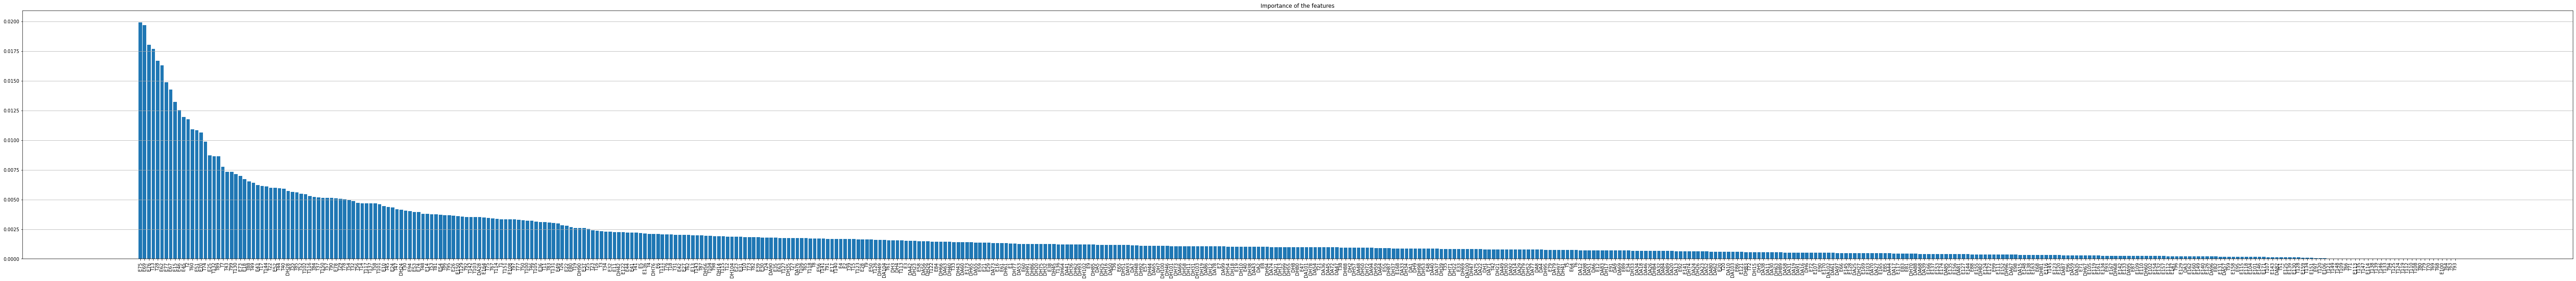

<Figure size 432x288 with 0 Axes>

In [5]:
names, indi = importance_of_features_random_forest(train_data, train_labels, test_data, test_labels)

In [6]:
print(indi[:40])

[0.00130593 0.00167472 0.00152785 0.00167631 0.00219028 0.00209424
 0.0010459  0.00101775 0.00119248 0.00444609 0.00225441 0.00071414
 0.00199305 0.00380734 0.01322077 0.0013279  0.00168587 0.00671738
 0.00103427 0.00059499 0.00136313 0.00277049 0.00185307 0.00432668
 0.00871772 0.00362311 0.00202214 0.00163489 0.00135217 0.00180269
 0.00184671 0.00227931 0.00082026 0.00069601 0.00177414 0.00310907
 0.00258162 0.00123802 0.00180911 0.00103108]


In [9]:
model, selector = train_random_forest_only_important_features(train_data, train_labels, test_data, test_labels, 0.005)

from sklearn.feature_selection import SelectFromModel
prediction = model.predict(selector.transform(blind_data))
acc = accuracy_score(blind_labels, prediction)
print("Overall accuracy: ", acc)

print("Confusion matrix")
cm = confusion_matrix(blind_labels, prediction)
print(cm)

print("Classification Report")
cr = classification_report(blind_labels, prediction)
print(cr)

(2050, 48)
Overall accuracy:  0.9702970297029703
Confusion matrix
[[247   2   9   0]
 [  0 248   9   1]
 [  3   6 256   0]
 [  0   0   0 229]]
Classification Report
              precision    recall  f1-score   support

           1       0.99      0.96      0.97       258
           2       0.97      0.96      0.96       258
           3       0.93      0.97      0.95       265
           4       1.00      1.00      1.00       229

    accuracy                           0.97      1010
   macro avg       0.97      0.97      0.97      1010
weighted avg       0.97      0.97      0.97      1010

Overall accuracy:  0.7
Confusion matrix
[[42  0  2  0]
 [ 0 74 17  1]
 [ 0 42 22  0]
 [ 0 28  0 72]]
Classification Report
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        44
           2       0.51      0.80      0.63        92
           3       0.54      0.34      0.42        64
           4       0.99      0.72      0.83       100

    a

In [35]:
blind_data_min = StandardScaler().fit_transform(blind_data)
model, selector = train_random_forest_only_important_features(train_data_stscaled, train_labels, test_data_stscaled, test_labels, 0.005)

from sklearn.feature_selection import SelectFromModel
prediction = model.predict(selector.transform(blind_data_min))

acc = accuracy_score(blind_labels, prediction)
print("Overall accuracy: ", acc)

print("Confusion matrix")
cm = confusion_matrix(blind_labels, prediction)
print(cm)

print("Classification Report")
cr = classification_report(blind_labels, prediction)
print(cr)

(2050, 47)
Overall accuracy:  0.9099009900990099
Confusion matrix
[[256   1   1   0]
 [ 18 227  12   1]
 [ 38  19 208   0]
 [  1   0   0 228]]
Classification Report
              precision    recall  f1-score   support

           1       0.82      0.99      0.90       258
           2       0.92      0.88      0.90       258
           3       0.94      0.78      0.86       265
           4       1.00      1.00      1.00       229

    accuracy                           0.91      1010
   macro avg       0.92      0.91      0.91      1010
weighted avg       0.92      0.91      0.91      1010

Overall accuracy:  0.35
Confusion matrix
[[41  1  2  0]
 [ 7 24 59  2]
 [ 8 19 37  0]
 [57 27 13  3]]
Classification Report
              precision    recall  f1-score   support

           1       0.36      0.93      0.52        44
           2       0.34      0.26      0.29        92
           3       0.33      0.58      0.42        64
           4       0.60      0.03      0.06       100

    

### 4.2 For scaled Data
#### 4.2.1 Standard Scaler

In [11]:
train_random_forest(train_data_stscaled, train_labels, test_data_stscaled, test_labels)

Overall accuracy:  0.4801980198019802
Confusion matrix
[[253   0   0   0]
 [271   5   0   0]
 [241   0   1   0]
 [ 12   0   1 226]]
Classification Report
              precision    recall  f1-score   support

           1       0.33      1.00      0.49       253
           2       1.00      0.02      0.04       276
           3       0.50      0.00      0.01       242
           4       1.00      0.95      0.97       239

    accuracy                           0.48      1010
   macro avg       0.71      0.49      0.38      1010
weighted avg       0.71      0.48      0.36      1010



In [4]:
model = kfold_random_forest(train_data_stscaled, train_labels, test_data_stscaled, test_labels, 40)

Validation results
[0.96153846 1.         0.88461538 0.88461538 0.96153846 0.96153846
 0.92307692 0.92307692 0.88461538 0.96153846 0.88       1.
 0.96       0.96       0.96       0.96       0.88       1.
 0.92       0.96       0.96       0.96       0.92       0.92
 0.96       0.96       1.         1.         0.88       1.
 0.92       0.96       0.96       0.96       1.         0.96
 1.         0.92       0.96       1.        ]
Mean accuracy
0.9506538461538462


In [13]:
blind_data = StandardScaler().fit_transform(blind_data)
model.predict_proba(blind_data)

array([[0.12, 0.43, 0.09, 0.36],
       [0.14, 0.39, 0.1 , 0.37],
       [0.09, 0.35, 0.18, 0.38],
       ...,
       [0.29, 0.25, 0.43, 0.03],
       [0.28, 0.28, 0.42, 0.02],
       [0.36, 0.27, 0.35, 0.02]])

## 5. Support Verctor Machine
### 5.1 For scaled Data

In [9]:
model = SVC(kernel = "linear", C=1)

# train model on training set
model.fit(train_data_stscaled, train_labels)

kf = KFold(n_splits=100, shuffle=True, random_state=1)
# Perform k-fold cross-validation
validation_results = cross_val_score(model,test_data_stscaled, test_labels, cv=kf, scoring="accuracy",n_jobs=-1) 
    
#Validation Results
print("Validation results")
print(validation_results)

# Mean of validation
print("Mean accuracy")
print(validation_results.mean())

Validation results
[0.72727273 0.90909091 0.81818182 1.         0.90909091 0.72727273
 0.81818182 0.72727273 0.72727273 0.81818182 0.9        0.8
 0.8        0.9        0.9        1.         0.9        0.9
 1.         1.         0.8        0.8        0.9        0.7
 1.         0.9        0.9        1.         0.9        0.7
 0.7        1.         0.9        0.9        1.         0.8
 1.         1.         1.         1.         0.9        0.8
 0.6        0.8        0.8        0.8        0.9        0.8
 0.7        0.9        1.         0.7        0.8        0.9
 0.8        1.         0.8        0.8        0.9        0.8
 0.9        0.9        0.7        0.9        0.9        0.9
 0.9        0.8        0.9        0.7        0.9        0.9
 0.9        0.8        0.7        1.         0.9        0.8
 0.9        0.8        1.         0.9        0.8        1.
 0.6        0.7        0.7        0.9        1.         0.8
 0.9        0.6        0.7        0.5        0.9        0.7
 0.9        1. 

In [8]:
model = SVC(kernel = "linear", C=1)

# train model on training set
model.fit(train_data_stscaled, train_labels)

predictions = model.predict(test_data_stscaled)
print("### Results on test set: ###")

acc = accuracy_score(test_labels, predictions)
print("Overall accuracy: ", acc)

print("Confusion matrix")
cm = confusion_matrix(test_labels, predictions)
print(cm)

print("Classification Report")
cr = classification_report(test_labels, predictions)
print(cr)

### Results on test set: ###
Overall accuracy:  0.8801980198019802
Confusion matrix
[[240   0  13   0]
 [  6 214  56   0]
 [ 13  33 196   0]
 [  0   0   0 239]]
Classification Report
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       253
           2       0.87      0.78      0.82       276
           3       0.74      0.81      0.77       242
           4       1.00      1.00      1.00       239

    accuracy                           0.88      1010
   macro avg       0.88      0.88      0.88      1010
weighted avg       0.88      0.88      0.88      1010



## 6. Neuronal Network

### Version 1

In [5]:
grid_search_neural_network(train_data_pca, train_labels)

{'activation': 'relu', 'batch_size': 5, 'epochs': 5, 'neurons': 500, 'optimizer': 'adam'}


In [4]:
grid_search_neural_network(train_data_stscaled, train_labels)

{'activation': 'sigmoid', 'batch_size': 10, 'epochs': 100, 'neurons': 100, 'optimizer': 'adam'}


In [5]:
grid_search_neural_network(train_data_min_max, train_labels)

{'activation': 'sigmoid', 'batch_size': 5, 'epochs': 100, 'neurons': 100, 'optimizer': 'adam'}


In [6]:
neural_network = KerasClassifier(build_fn=create_neural_network_1_node, epochs=100, batch_size=100)

validation_result = cross_val_score(neural_network, train_data, train_labels, cv=3)
validation_result.mean()

 0.3050
Epoch 20/100
14/14 [==============================] - 0s 858us/step - loss: 242255936.0000 - accuracy: 0.3453
Epoch 21/100
14/14 [==============================] - 0s 858us/step - loss: 127076776.0000 - accuracy: 0.3036
Epoch 22/100
14/14 [==============================] - 0s 858us/step - loss: 152638816.0000 - accuracy: 0.3080
Epoch 23/100
14/14 [==============================] - 0s 1ms/step - loss: 154153648.0000 - accuracy: 0.3365
Epoch 24/100
14/14 [==============================] - 0s 858us/step - loss: 119024080.0000 - accuracy: 0.3292
Epoch 25/100
14/14 [==============================] - 0s 858us/step - loss: 87752672.0000 - accuracy: 0.3328
Epoch 26/100
14/14 [==============================] - 0s 858us/step - loss: 161878192.0000 - accuracy: 0.3094
Epoch 27/100
14/14 [==============================] - 0s 929us/step - loss: 203249568.0000 - accuracy: 0.3307
Epoch 28/100
14/14 [==============================] - 0s 929us/step - loss: 118327872.0000 - accuracy: 0.2992
Epoch

0.39902791380882263

In [9]:
neural_network_st = KerasClassifier(build_fn=create_neural_network_1_node, epochs=100, batch_size=10)

validation_result_st = cross_val_score(neural_network_st, train_data_stscaled, train_labels, cv=3)
validation_result_st.mean()

: 0.9561
Epoch 11/100
137/137 [==============================] - 0s 533us/step - loss: 0.1090 - accuracy: 0.9605
Epoch 12/100
137/137 [==============================] - 0s 533us/step - loss: 0.1173 - accuracy: 0.9634
Epoch 13/100
137/137 [==============================] - 0s 519us/step - loss: 0.1288 - accuracy: 0.9649
Epoch 14/100
137/137 [==============================] - 0s 526us/step - loss: 0.1150 - accuracy: 0.9554
Epoch 15/100
137/137 [==============================] - 0s 533us/step - loss: 0.1161 - accuracy: 0.9620
Epoch 16/100
137/137 [==============================] - 0s 526us/step - loss: 0.1194 - accuracy: 0.9583
Epoch 17/100
137/137 [==============================] - 0s 533us/step - loss: 0.0815 - accuracy: 0.9729
Epoch 18/100
137/137 [==============================] - 0s 541us/step - loss: 0.1379 - accuracy: 0.9671
Epoch 19/100
137/137 [==============================] - 0s 533us/step - loss: 0.0704 - accuracy: 0.9781
Epoch 20/100
137/137 [==============================] -

0.9248834848403931

In [16]:
neural_network_minmax = KerasClassifier(build_fn=create_neural_network_1_node, epochs=200, batch_size=5)

validation_result_minmax = cross_val_score(neural_network_minmax, train_data_min_max, train_labels, cv=3)
validation_result_minmax.mean()

0s 497us/step - loss: 0.4001 - accuracy: 0.8120
Epoch 11/200
274/274 [==============================] - 0s 511us/step - loss: 0.3834 - accuracy: 0.8339
Epoch 12/200
274/274 [==============================] - 0s 504us/step - loss: 0.3698 - accuracy: 0.8332
Epoch 13/200
274/274 [==============================] - 0s 504us/step - loss: 0.3575 - accuracy: 0.8347
Epoch 14/200
274/274 [==============================] - 0s 526us/step - loss: 0.3665 - accuracy: 0.8259
Epoch 15/200
274/274 [==============================] - 0s 515us/step - loss: 0.3463 - accuracy: 0.8603
Epoch 16/200
274/274 [==============================] - 0s 508us/step - loss: 0.3391 - accuracy: 0.8581
Epoch 17/200
274/274 [==============================] - 0s 500us/step - loss: 0.3167 - accuracy: 0.8493
Epoch 18/200
274/274 [==============================] - 0s 515us/step - loss: 0.3557 - accuracy: 0.8442
Epoch 19/200
274/274 [==============================] - 0s 508us/step - loss: 0.3131 - accuracy: 0.8537
Epoch 20/200
274

0.9302462538083395

In [15]:
validation_result_minmax

array([0.9020468 , 0.91654468, 0.90483165])

In [19]:
def create_neural_network_1_node(optimizer='rmsprop', activation="relu", neurons=100):

    network = models.Sequential()

    network.add(layers.Dense(units=250,activation="relu",input_shape=(533,)))
    network.add(layers.Dense(units=4, activation="softmax"))

    network.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return network

#grid_result=optimized_neural_network(train_data, train_labels)
data_train = np.asmatrix(train_data_min_max)
target_train = to_categorical(train_labels.to_numpy()-1, num_classes=4)
neural_network = KerasClassifier(build_fn=create_neural_network_1_node, verbose=0)

epochs = [5, 100]
batches = [5, 10, 100]
optimizers = ["rmsprop", "adam", "sgd"]
activation = ["relu", "tanh", "sigmoid"]
neurons = [100, 500]

hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, activation=activation, neurons=neurons)

# Gittersuche erstellen
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters, n_jobs=-1)
# Gittersuche anpassen
grid_result = grid.fit(data_train, target_train)

In [20]:
grid_result.best_params_

{'activation': 'sigmoid',
 'batch_size': 5,
 'epochs': 100,
 'neurons': 500,
 'optimizer': 'adam'}

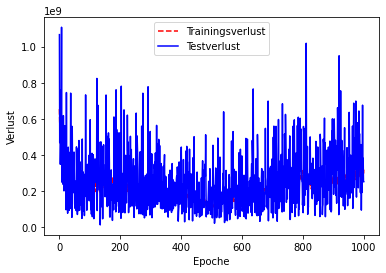

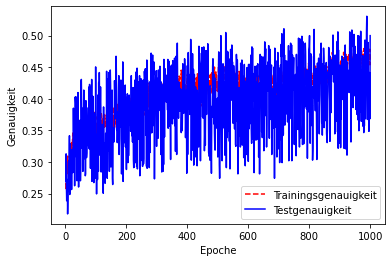

In [7]:
neuronal_network_1_node(train_data, train_labels, test_data, test_labels, 533)

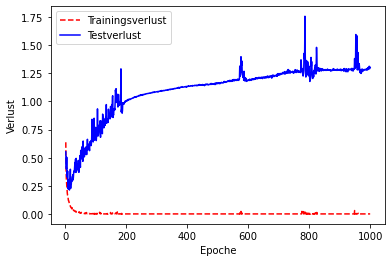

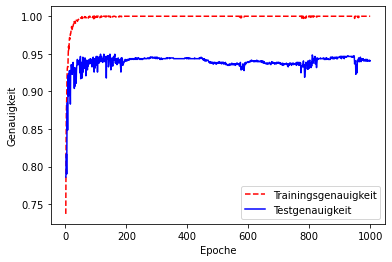

In [5]:
neuronal_network_1_node(train_data_stscaled, train_labels, test_data_stscaled, test_labels, 533)

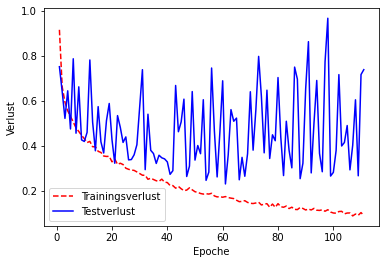

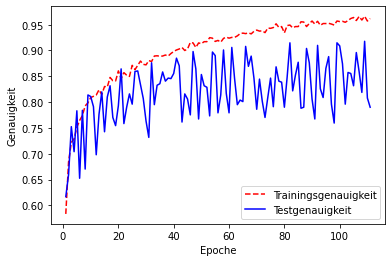

In [7]:
neuronal_network_1_node(train_data_min_max, train_labels, test_data_min_max, test_labels, 533)

In [29]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint


np.random.seed(0)
number_of_features = 533

tokenizer = Tokenizer(num_words=number_of_features)
features_train = np.asmatrix(train_data_stscaled)
features_test = np.asmatrix(test_data_stscaled)


target_train = to_categorical(train_labels.to_numpy()-1, num_classes=4)
target_test = to_categorical(test_labels.to_numpy()-1, num_classes=4)

network = models.Sequential()

network.add(layers.Dense(units=100,activation="relu",input_shape=(number_of_features,)))

network.add(layers.Dense(units=250, activation="relu"))

network.add(layers.Dense(units=4, activation="softmax"))
#network.add(layers.Dense(units=4, activation="sigmoid"))

network.compile(loss="categorical_crossentropy", # Kreuzentropie
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Performancemetrik Genauigkeit
print(features_train.shape)
print(target_train.shape)
print(target_train)

# Callback-Funktionen einrichten, um Training frühzeitig zu stoppen und das
# bislang beste Modell zu speichern
callbacks = [EarlyStopping(monitor="val_loss", patience=50),
ModelCheckpoint(filepath="best_model.h5",
monitor="val_loss",
save_best_only=True)]

# Neuronales Netz trainieren
history = network.fit(features_train, # Merkmale
target_train, # Ziel
epochs=100,
callbacks=callbacks,
verbose=0, # Keine Ausgabe
batch_size=30, # Anzahl der Beobachtungen pro Batch
validation_data=(features_test, target_test)) # Testdaten

(2050, 533)
(2050, 4)
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [30]:
predicted_target = network.predict(features_test)
predicted_target[800].round()
blind_test_value = raw_data
#blind_test_value.pop('class')
blind_test_value = StandardScaler().fit_transform(blind_test_value)

#print(blind_test_value[3000])
blind_test_v = np.asmatrix(blind_test_value[307])
predicted_target = network.predict(blind_test_v)
predicted_target.round()

array([[0., 1., 0., 0.]], dtype=float32)

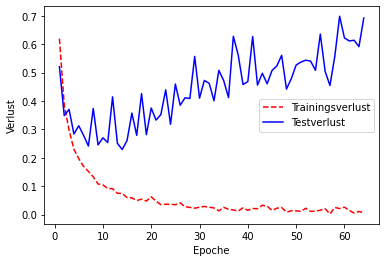

In [31]:
# Die Verläufe von Trainings- und Testverlusten abrufen
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Zähler für die Anzahl der Epochen erstellen
epoch_count = range(1, len(training_loss) + 1)

# Verlustverlauf visualisieren
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Trainingsverlust", "Testverlust"])
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.show()

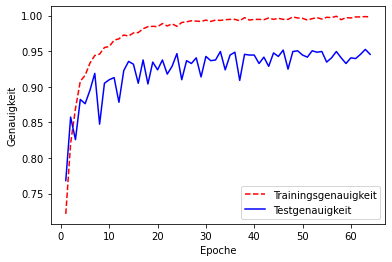

In [32]:
# Verläufe von Trainings- und Testgenauigkeit abrufen
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Genauigkeitsverlauf visualisieren
plt.legend(["Trainingsgenauigkeit", "Testgenauigkeit"])
plt.xlabel("Epoche")
plt.ylabel("Genauigkeit")
fig1 = plt.gcf()
plt.show()
#plt.draw()
#fig1.savefig('Neuronales_Netz_Genauigkeit.png', dpi=100)

### Version 2

In [33]:
#Changing parameter 
#alpha helps overfitting
alpha_value = 1e-5
#f.e. 0.001; 0.1; 10
#Hidden_layer_sizes
layers = (5,2)

In [34]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver ='lbfgs', alpha = alpha_value, hidden_layer_sizes=layers, random_state=1)
classes = [1,2,3,4]
clf.fit(train_data_stscaled, train_labels)
predictions = clf.predict(test_data_stscaled)

In [35]:
#predictions = clf.predict(test_data_stscaled)
print("### Results on test set: ###")

acc = accuracy_score(test_labels, predictions)
print("Overall accuracy: ", acc)

print("Confusion matrix")
cm = confusion_matrix(test_labels, predictions)
print(cm)

print("Classification Report")
cr = classification_report(test_labels, predictions)
print(cr)

### Results on test set: ###
Overall accuracy:  0.7336633663366336
Confusion matrix
[[247   0   6   0]
 [  6 130 135   5]
 [ 62  51 129   0]
 [  1   0   3 235]]
Classification Report
              precision    recall  f1-score   support

           1       0.78      0.98      0.87       253
           2       0.72      0.47      0.57       276
           3       0.47      0.53      0.50       242
           4       0.98      0.98      0.98       239

    accuracy                           0.73      1010
   macro avg       0.74      0.74      0.73      1010
weighted avg       0.74      0.73      0.73      1010



In [36]:
from sklearn.neural_network import MLPRegressor
rlf = MLPRegressor(solver ='lbfgs', alpha = alpha_value, hidden_layer_sizes=layers, random_state=1)
classes = [1,2,3,4]
rlf.fit(train_data_stscaled, train_labels)
predictions = rlf.predict(test_data_stscaled)
#Array has not class values but varing values (like 1.2 etc) so we need to round the results
predictions = np.round(predictions, 0)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

import statistics

from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()

#X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.025, random_state=112)
#print(y_test)
pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components=40)),
                ('classifier', DecisionTreeClassifier())])
acc_score_mean = []
acc_score = []

X_data_np = X_data.to_numpy()
kf = KFold(n_splits=40)
for X_train_index, X_test_index in kf.split(X_data):
    X_train, X_test, y_train, y_test = X_data_np[X_train_index], X_data_np[X_test_index], y_labels[X_train_index], y_labels[X_test_index] 

    pipe.fit(X_train, y_train)
    cross_val = cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1)
    #acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())
    
    score = pipe.score(X_test, y_test)
    acc_score.append(score)
print(statistics.mean(acc_score_mean))
print(acc_score)
print(score)


0.6135955279278429
[0.6428571428571429, 0.5535714285714286, 0.5714285714285714, 0.6160714285714286, 0.6517857142857143, 0.6339285714285714, 0.5625, 0.625, 0.41964285714285715, 0.5625, 0.6696428571428571, 0.7142857142857143, 0.6428571428571429, 0.8303571428571429, 0.25892857142857145, 0.75, 0.5446428571428571, 0.41964285714285715, 0.6696428571428571, 0.8303571428571429, 0.35714285714285715, 0.6339285714285714, 0.5625, 0.4017857142857143, 0.36607142857142855, 0.6875, 0.625, 0.5803571428571429, 0.6339285714285714, 0.875, 0.6607142857142857, 0.6517857142857143, 0.6696428571428571, 0.7589285714285714, 0.6696428571428571, 0.6785714285714286, 0.75, 0.6160714285714286, 0.026785714285714284, 0.6785714285714286]
0.6785714285714286


In [80]:
print(acc_score_mean)

[0.608749387288631, 0.6119606501686758, 0.622721041360311, 0.6268308602074437, 0.5902023847906034, 0.6085187194791102, 0.6002807332090873, 0.607596048241027, 0.6112809664981218, 0.59867837830045, 0.5998233294277079, 0.6183703319257354, 0.6005090419160107, 0.6078269781730585, 0.594553094225179, 0.6098909308232482, 0.6304908768260109, 0.6227150125425622, 0.6222518420659447, 0.6089829384457708, 0.63026020901649, 0.6140088754682164, 0.6394274195873668, 0.6227050518871511, 0.5954676396654268, 0.6261572053546386, 0.6202091213391314, 0.6330127575026017, 0.596619405977966, 0.5986789025454717, 0.6046264623159573, 0.615622239522308, 0.6360004298809177, 0.6341674071627598, 0.633254172335066, 0.6202114804417288, 0.6025635581558109, 0.622951447047321, 0.6430871740834231, 0.6398884930838975]


In [45]:
X_data_np = X_data.to_numpy()
kf = KFold(n_splits=40)
for X_train_index, X_test_index in kf.split(X_data):
    X_train, X_test, y_train, y_test = X_data_np[X_train_index], X_data_np[X_test_index], y_labels[X_train_index], y_labels[X_test_index] 
    print(X_train, X_test)
    break

[[ 2.45178e-03  1.40402e-01 -1.56711e-02 ...  1.36205e+01  9.89247e+07
   3.90100e+07]
 [ 9.86338e-03  1.38062e-01 -8.70505e-03 ...  1.22179e+01  1.00038e+08
   3.90656e+07]
 [ 6.49588e-03  1.40430e-01 -1.17472e-02 ...  1.21364e+01  9.99300e+07
   3.91207e+07]
 ...
 [ 2.46725e-02  2.13325e-01  1.44175e-02 ...  5.88492e+00  6.01107e+06
   4.25422e+05]
 [ 2.50627e-02  2.12210e-01  1.56559e-02 ...  4.43563e+00  6.54401e+06
   4.39695e+05]
 [ 2.55506e-03  2.32580e-01 -4.53668e-03 ...  2.52386e+00  6.72173e+06
   4.54341e+05]] [[-4.12521e-03  2.54095e-01  1.42635e-03 ...  1.80247e+00  1.41331e+06
   3.02808e+06]
 [ 3.10286e-02  1.93761e-01  1.29177e-02 ...  1.52349e+00  1.39018e+06
   3.01642e+06]
 [ 1.56778e-02  1.82336e-01 -3.02791e-03 ...  1.25860e+00  1.23411e+06
   3.00443e+06]
 ...
 [ 3.91015e-01  2.38600e+00  3.64474e-01 ...  8.72601e+00  2.41380e+07
   4.92121e+06]
 [-1.57378e-01  2.42888e+00 -3.25868e-01 ...  8.94640e+00  2.33935e+07
   4.95523e+06]
 [-1.63440e-01  2.39970e+00 -3.2

In [5]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components=40)),
                ('classifier', RandomForestClassifier())])
acc_score_mean = []
acc_score = []

X_data_np = X_data.to_numpy()
kf = KFold(n_splits=40)
for X_train_index, X_test_index in kf.split(X_data):
    X_train, X_test, y_train, y_test = X_data_np[X_train_index], X_data_np[X_test_index], y_labels[X_train_index], y_labels[X_test_index] 
    
    pipe.fit(X_train, y_train)
    cross_val = cross_val_score(pipe, X_train, y_train, cv=40, n_jobs=-1)
    #acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())
    score = pipe.score(X_test, y_test)
    acc_score.append(score)

print(statistics.mean(acc_score_mean))
print(statistics.mean(acc_score))

0.7529707047539617
0.7091517857142857


In [1]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

import statistics

from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()

from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components=40)),
                ('classifier', RandomForestClassifier())])
acc_score_mean = []
acc_score = []

for i in range(5):
    cross_val = cross_val_score(pipe, X_data, y_labels, cv=40, n_jobs=-1)
    #acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())
    #score = pipe.score(X_test, y_test)
    #acc_score.append(score)
    print(cross_val)

print(statistics.mean(acc_score_mean))

[0.79464286 0.65178571 0.67857143 0.59821429 0.83035714 0.67857143
 0.67857143 0.71428571 0.61607143 0.74107143 0.78571429 0.75892857
 0.73214286 0.90178571 0.41071429 0.83035714 0.58928571 0.625
 0.61607143 0.8125     0.53571429 0.60714286 0.65178571 0.69642857
 0.71428571 0.70535714 0.75892857 0.52678571 0.625      0.91071429
 0.80357143 0.75       0.75       0.86607143 0.73214286 0.65178571
 0.83928571 0.71428571 0.47321429 0.73214286]
[0.73214286 0.73214286 0.70535714 0.5625     0.84821429 0.5625
 0.65178571 0.73214286 0.5625     0.77678571 0.78571429 0.79464286
 0.78571429 0.91071429 0.36607143 0.84821429 0.58928571 0.71428571
 0.60714286 0.78571429 0.51785714 0.54464286 0.64285714 0.61607143
 0.6875     0.79464286 0.77678571 0.50892857 0.69642857 0.90178571
 0.77678571 0.77678571 0.67857143 0.8125     0.75       0.70535714
 0.72321429 0.73214286 0.48214286 0.74107143]
[0.75892857 0.70535714 0.70535714 0.59821429 0.79464286 0.66964286
 0.66071429 0.72321429 0.59821429 0.80357143 0

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score

import statistics

from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()

from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=40)),
                ('classifier', RandomForestClassifier())])
acc_score_mean = []
acc_score = []

for i in range(5):
    cross_val = cross_val_score(pipe, X_data, y_labels, cv=40, n_jobs=-1)
    #acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())
    #score = pipe.score(X_test, y_test)
    #acc_score.append(score)
    print(cross_val)

print(statistics.mean(acc_score_mean))

[0.64285714 0.75892857 0.66964286 0.47321429 0.79464286 0.70535714
 0.69642857 0.6875     0.64285714 0.70535714 0.83035714 0.78571429
 0.78571429 0.88392857 0.51785714 0.86607143 0.54464286 0.66071429
 0.63392857 0.77678571 0.60714286 0.61607143 0.57142857 0.75
 0.70535714 0.69642857 0.75       0.57142857 0.61607143 0.875
 0.70535714 0.77678571 0.58035714 0.77678571 0.71428571 0.77678571
 0.875      0.72321429 0.33928571 0.77678571]
[0.79464286 0.76785714 0.6875     0.45535714 0.8125     0.71428571
 0.69642857 0.72321429 0.60714286 0.75       0.8125     0.75892857
 0.78571429 0.89285714 0.44642857 0.84821429 0.5625     0.66071429
 0.64285714 0.79464286 0.57142857 0.57142857 0.59821429 0.8125
 0.70535714 0.6875     0.76785714 0.64285714 0.625      0.85714286
 0.70535714 0.84821429 0.625      0.76785714 0.67857143 0.80357143
 0.83928571 0.76785714 0.46428571 0.83035714]
[0.70535714 0.76785714 0.66071429 0.44642857 0.79464286 0.71428571
 0.64285714 0.72321429 0.60714286 0.71428571 0.8125 

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import RFE

import statistics

from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()

from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                ('rfe', RFE(estimator=RandomForestClassifier(),n_features_to_select=40)),
                ('classifier', RandomForestClassifier())])
acc_score_mean = []
acc_score = []

for i in range(20):
    cross_val = cross_val_score(pipe, X_data, y_labels, cv=40, n_jobs=-1)
    #acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())
    #score = pipe.score(X_test, y_test)
    #acc_score.append(score)
    print(cross_val)

print(statistics.mean(acc_score_mean))

[0.65178571 0.80357143 0.67857143 0.66964286 0.90178571 0.67857143
 0.78571429 0.73214286 0.71428571 0.84821429 0.65178571 0.83035714
 0.84821429 0.90178571 0.48214286 0.95535714 0.64285714 0.72321429
 0.61607143 0.96428571 0.61607143 0.6875     0.66964286 0.92857143
 0.69642857 0.70535714 0.74107143 0.49107143 0.63392857 0.97321429
 0.6875     0.6875     0.6875     0.91964286 0.86607143 0.85714286
 0.74107143 0.83035714 0.5        0.80357143]
[0.63392857 0.78571429 0.69642857 0.67857143 0.83035714 0.71428571
 0.75892857 0.74107143 0.77678571 0.86607143 0.625      0.83035714
 0.85714286 0.91071429 0.49107143 0.94642857 0.64285714 0.65178571
 0.59821429 0.94642857 0.60714286 0.71428571 0.64285714 0.91071429
 0.66071429 0.71428571 0.75892857 0.49107143 0.63392857 0.97321429
 0.67857143 0.67857143 0.6875     0.91964286 0.88392857 0.875
 0.80357143 0.74107143 0.45535714 0.83035714]
[0.6875     0.83035714 0.66071429 0.83928571 0.875      0.66964286
 0.78571429 0.73214286 0.65178571 0.821428

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


pipe = Pipeline([('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=40)),
                ('classifier', RandomForestClassifier())])
acc_score_mean = []
acc_score = []

X_data_np = X_data.to_numpy()
kf = KFold(n_splits=40)
for X_train_index, X_test_index in kf.split(X_data):
    X_train, X_test, y_train, y_test = X_data_np[X_train_index], X_data_np[X_test_index], y_labels[X_train_index], y_labels[X_test_index] 
   
    
    cross_val = cross_val_score(pipe, X_train, y_train, cv=5, n_jobs=-1)
    acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())

print(statistics.mean(acc_score_mean))
print(acc_score)

0.7169697785851151
[array([0.69336384, 0.76773455, 0.69107551, 0.72164948, 0.74455899]), array([0.68535469, 0.77688787, 0.68077803, 0.74799542, 0.73997709]), array([0.68764302, 0.75400458, 0.68421053, 0.73997709, 0.73195876]), array([0.70022883, 0.77688787, 0.68077803, 0.71706758, 0.74799542]), array([0.67276888, 0.79405034, 0.70251716, 0.73310424, 0.73654066]), array([0.6819222 , 0.7826087 , 0.70251716, 0.73768614, 0.70332188]), array([0.67505721, 0.76887872, 0.69679634, 0.70446735, 0.73081329]), array([0.6979405 , 0.76773455, 0.67391304, 0.72623139, 0.74570447]), array([0.70938215, 0.76315789, 0.69450801, 0.7067583 , 0.74112257]), array([0.72883295, 0.75514874, 0.68535469, 0.71019473, 0.72737686]), array([0.69908467, 0.74485126, 0.68993135, 0.72623139, 0.73997709]), array([0.67963387, 0.74141876, 0.70022883, 0.73424971, 0.7021764 ]), array([0.71510297, 0.75171625, 0.68993135, 0.72852234, 0.73768614]), array([0.70366133, 0.72997712, 0.68764302, 0.73539519, 0.74112257]), array([0.69221

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score

import statistics

from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()


pipe = Pipeline([('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=40)),
                ('classifier', LinearSVC())])
acc_score_mean = []
acc_score = []

for i in range(10):
    cross_val = cross_val_score(pipe, X_data, y_labels, cv=40, n_jobs=-1)
    #acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())
    #score = pipe.score(X_test, y_test)
    #acc_score.append(score)
    print(cross_val)

print(statistics.mean(acc_score_mean))
print(1-statistics.mean(acc_score_mean))

[0.77678571 0.75892857 0.625      0.84821429 0.79464286 0.66964286
 0.6875     0.73214286 0.67857143 0.8125     0.82142857 0.78571429
 0.76785714 0.86607143 0.54464286 0.83035714 0.59821429 0.66071429
 0.64285714 0.84821429 0.53571429 0.74107143 0.80357143 0.75
 0.75892857 0.82142857 0.83928571 0.54464286 0.66071429 0.85714286
 0.82142857 0.79464286 0.63392857 0.75       0.74107143 0.96428571
 0.875      0.88392857 0.5        0.77678571]
[0.77678571 0.75892857 0.625      0.83928571 0.79464286 0.66964286
 0.6875     0.73214286 0.67857143 0.82142857 0.82142857 0.78571429
 0.76785714 0.86607143 0.54464286 0.83035714 0.59821429 0.66964286
 0.64285714 0.84821429 0.53571429 0.74107143 0.79464286 0.75
 0.75892857 0.82142857 0.83928571 0.54464286 0.66071429 0.85714286
 0.8125     0.79464286 0.63392857 0.75       0.74107143 0.96428571
 0.875      0.88392857 0.5        0.77678571]
[0.77678571 0.75892857 0.625      0.84821429 0.79464286 0.66964286
 0.6875     0.73214286 0.67857143 0.8125     0.82

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

import statistics

from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()

from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components=40)),
                ('classifier', LinearSVC())])
acc_score_mean = []
acc_score = []

for i in range(5):
    cross_val = cross_val_score(pipe, X_data, y_labels, cv=40, n_jobs=-1)
    #acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())
    #score = pipe.score(X_test, y_test)
    #acc_score.append(score)
    print(cross_val)

print(statistics.mean(acc_score_mean))
print(1-statistics.mean(acc_score_mean))

[0.70535714 0.66964286 0.69642857 0.75       0.6875     0.67857143
 0.70535714 0.6875     0.55357143 0.79464286 0.82142857 0.78571429
 0.67857143 0.88392857 0.49107143 0.86607143 0.67857143 0.77678571
 0.66071429 0.83035714 0.59821429 0.61607143 0.79464286 0.63392857
 0.75       0.74107143 0.69642857 0.66964286 0.51785714 0.88392857
 0.75892857 0.71428571 0.66964286 0.61607143 0.75       0.90178571
 0.8125     0.85714286 0.75892857 0.79464286]
[0.74107143 0.67857143 0.64285714 0.8125     0.70535714 0.70535714
 0.69642857 0.6875     0.58035714 0.78571429 0.82142857 0.77678571
 0.77678571 0.86607143 0.5        0.86607143 0.65178571 0.80357143
 0.65178571 0.80357143 0.55357143 0.625      0.77678571 0.64285714
 0.74107143 0.8125     0.67857143 0.66071429 0.51785714 0.875
 0.75892857 0.75       0.60714286 0.625      0.73214286 0.84821429
 0.84821429 0.88392857 0.73214286 0.82142857]
[0.74107143 0.625      0.63392857 0.78571429 0.69642857 0.6875
 0.6875     0.65178571 0.58928571 0.8125     0

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

import statistics

from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()

from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components=40)),
                ('classifier', SVC())])
acc_score_mean = []
acc_score = []

for i in range(5):
    cross_val = cross_val_score(pipe, X_data, y_labels, cv=40, n_jobs=-1)
    #acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())
    #score = pipe.score(X_test, y_test)
    #acc_score.append(score)
    print(cross_val)

print(statistics.mean(acc_score_mean))

[0.77678571 0.65178571 0.67857143 0.48214286 0.78571429 0.67857143
 0.70535714 0.61607143 0.45535714 0.82142857 0.84821429 0.8125
 0.76785714 0.9375     0.47321429 0.83928571 0.72321429 0.79464286
 0.625      0.875      0.58928571 0.60714286 0.73214286 0.55357143
 0.70535714 0.66071429 0.71428571 0.72321429 0.58035714 0.90178571
 0.73214286 0.69642857 0.74107143 0.76785714 0.75892857 0.84821429
 0.875      0.83928571 0.25       0.78571429]
[0.76785714 0.65178571 0.67857143 0.53571429 0.78571429 0.67857143
 0.71428571 0.61607143 0.46428571 0.83035714 0.84821429 0.8125
 0.77678571 0.9375     0.47321429 0.83035714 0.72321429 0.78571429
 0.625      0.875      0.58928571 0.625      0.75       0.57142857
 0.70535714 0.66071429 0.71428571 0.71428571 0.57142857 0.90178571
 0.72321429 0.6875     0.74107143 0.76785714 0.76785714 0.83035714
 0.88392857 0.83928571 0.25       0.77678571]
[0.77678571 0.65178571 0.66964286 0.5        0.78571429 0.6875
 0.71428571 0.61607143 0.45535714 0.82142857 0.84

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score

import statistics

from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()

from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=40)),
                ('classifier', SVC())])
acc_score_mean = []
acc_score = []

for i in range(5):
    cross_val = cross_val_score(pipe, X_data, y_labels, cv=40, n_jobs=-1)
    #acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())
    #score = pipe.score(X_test, y_test)
    #acc_score.append(score)
    print(cross_val)

print(statistics.mean(acc_score_mean))

[0.75892857 0.83928571 0.76785714 0.5        0.8125     0.69642857
 0.72321429 0.64285714 0.60714286 0.83035714 0.875      0.86607143
 0.77678571 0.91964286 0.48214286 0.875      0.64285714 0.76785714
 0.60714286 0.89285714 0.60714286 0.53571429 0.77678571 0.70535714
 0.61607143 0.73214286 0.76785714 0.58035714 0.75892857 0.91964286
 0.77678571 0.8125     0.70535714 0.80357143 0.72321429 0.73214286
 0.80357143 0.85714286 0.25       0.80357143]
[0.76785714 0.83928571 0.76785714 0.5        0.8125     0.69642857
 0.72321429 0.64285714 0.60714286 0.83035714 0.875      0.86607143
 0.77678571 0.91964286 0.48214286 0.875      0.64285714 0.77678571
 0.60714286 0.89285714 0.60714286 0.53571429 0.77678571 0.70535714
 0.61607143 0.73214286 0.76785714 0.58035714 0.75892857 0.91964286
 0.77678571 0.8125     0.70535714 0.80357143 0.72321429 0.73214286
 0.80357143 0.85714286 0.25       0.80357143]
[0.75892857 0.83928571 0.76785714 0.5        0.8125     0.69642857
 0.72321429 0.64285714 0.60714286 0.8

In [44]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
#seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
print(type(data))
# calculate interquartile range
q25, q75 = percentile(X_data, 25), percentile(X_data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in X_data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in X_data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

<class 'numpy.ndarray'>
Percentiles: 25th=0.011, 75th=103.195, IQR=103.185


TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [24]:
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()


for row in X_data:
    for column in X_data:
        print(X_data[row])

        # calculate interquartile range
        q25, q75 = percentile(X_data[row], 25), percentile(X_data[row], 75)
        iqr = q75 - q25
        print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        # identify outliers
        outliers = [x for x in X_data[row] if x < lower or x > upper]


        print('Identified outliers: %d' % len(outliers))
        # remove outliers
        outliers_removed = [x for x in X_data[row] if x >= lower and x <= upper]
        print('Non-outlier observations: %d' % len(outliers_removed))
        break


Non-outlier observations: 3986
0       1474.81
1       1472.60
2       1391.19
3       1321.79
4       1232.06
         ...   
4475    3256.33
4476    3269.56
4477    3229.11
4478    3253.69
4479    3260.80
Name: DH46, Length: 4480, dtype: float64
Percentiles: 25th=658.855, 75th=6307.283, IQR=5648.427
Identified outliers: 490
Non-outlier observations: 3990
0       0.359836
1       0.620542
2      -0.108165
3       0.047405
4      -0.212860
          ...   
4475   -1.150950
4476   -1.281590
4477   -1.458770
4478   -2.193050
4479   -0.211799
Name: DH47, Length: 4480, dtype: float64
Percentiles: 25th=-0.183, 75th=0.861, IQR=1.044
Identified outliers: 311
Non-outlier observations: 4169
0       2.67580
1       2.80305
2       1.73302
3       2.09766
4       1.78033
         ...   
4475    3.29461
4476    3.54178
4477    3.98080
4478    6.74030
4479    2.52437
Name: DH48, Length: 4480, dtype: float64
Percentiles: 25th=2.268, 75th=4.372, IQR=2.104
Identified outliers: 427
Non-outlier observat

In [14]:
X_data

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,DH95,DH96,DH97,DH98,DH99,DH100,DH101,DH102,DH103,DH104
0,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,0.10763,...,31.4249,1015.36,7.170320e+08,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0
1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,0.11163,...,31.4354,1015.78,7.058540e+08,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0
2,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,0.08863,...,31.4480,1016.16,6.270180e+08,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0
3,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,0.07163,...,31.4333,1015.61,5.597480e+08,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0
4,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,0.07163,...,31.4346,1015.67,4.844730e+08,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,-0.015981,0.254373,-0.013341,-0.00101,-0.165105,5.15843,1.03999,-1.19301,-0.15801,0.12299,...,31.4079,1014.61,3.237410e+09,0.132094,9.48535,73.9901,31.82590,5.16972,6390410.0,398810.0
4476,-0.008857,0.238946,-0.010767,-0.00901,-0.034522,5.43013,1.01499,-1.10201,-0.14501,0.11899,...,31.4447,1016.07,3.156070e+09,0.133406,8.73701,68.4041,29.83820,5.06743,6214830.0,412407.0
4477,0.024672,0.213325,0.014418,0.01099,0.613841,4.55481,1.01499,-0.57301,-0.10401,0.13699,...,31.4487,1016.06,3.052520e+09,0.138525,8.90410,68.5051,30.45150,5.88492,6011070.0,425422.0
4478,0.025063,0.212210,0.015656,0.01299,0.593249,4.58374,0.95799,-0.64101,-0.10001,0.13299,...,31.4353,1015.80,3.322710e+09,0.076570,8.97766,72.4431,30.38700,4.43563,6544010.0,439695.0


In [2]:
from sklearn.preprocessing import StandardScaler
from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()

scaler = StandardScaler()
X_data_st = scaler.fit_transform(X_data)
print(scaler.fit(X_data))
print(scaler.transform(X_data))

StandardScaler()
[[-0.15868065 -0.34105678 -0.12282894 ... -0.46644401 -0.49746607
  -0.3709597 ]
 [-0.0825109  -0.42875958 -0.10045756 ... -0.4836908  -0.4978073
  -0.37136893]
 [-0.11577235 -0.44536721 -0.1315005  ... -0.50006654 -0.50010975
  -0.37178975]
 ...
 [-0.09628302 -0.40032093 -0.09753775 ... -0.2140633  -0.42963679
  -0.46230625]
 [-0.09543755 -0.40194172 -0.09512683 ... -0.3036597  -0.4217745
  -0.4618053 ]
 [-0.14420613 -0.37233145 -0.13443777 ... -0.42184704 -0.41915265
  -0.46129127]]


In [29]:
X_data_st_clean = X_data_st[ ( X_data_st <=3 )]

In [3]:
len(X_data_st)
test = []
for x in X_data_st:
    
    #x[:] = 
    x = [xx for xx in x if xx <= 3 or xx >= -3]
    test.append([x])
for x in X_data_st:
    print(len(test))

4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480
4480


In [1]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

import statistics

from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()



acc_score_mean = []
acc_score = []


np.random.seed(0)
number_of_features = 533

tokenizer = Tokenizer(num_words=number_of_features)
#features_train = np.asmatrix(train_data_stscaled)
#features_test = np.asmatrix(test_data_stscaled)


#target_train = to_categorical(train_labels.to_numpy()-1, num_classes=4)
#target_test = to_categorical(test_labels.to_numpy()-1, num_classes=4)
def threeLayerModel():
    network = models.Sequential()

    network.add(layers.Dense(units=100,activation="relu",input_shape=(number_of_features,)))

    network.add(layers.Dense(units=250, activation="relu"))

    network.add(layers.Dense(units=4, activation="softmax"))
    #network.add(layers.Dense(units=4, activation="sigmoid"))

    network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    #print(features_train.shape)
    #print(target_train.shape)
    #print(target_train)

    return network

# Callback-Funktionen einrichten, um Training frühzeitig zu stoppen und das
# bislang beste Modell zu speichern
#callbacks = [EarlyStopping(monitor="val_loss", patience=50),
#ModelCheckpoint(filepath="best_model.h5",
#monitor="val_loss",
#save_best_only=True)]

# Neuronales Netz trainieren
#history = network.fit(features_train, # Merkmale
#target_train, # Ziel
#epochs=100,
##callbacks=callbacks,
#verbose=0, # Keine Ausgabe
#batch_size=30, # Anzahl der Beobachtungen pro Batch
#validation_data=(features_test, target_test)) # Testdaten



#pipe = Pipeline([('scaler', MinMaxScaler()),
#                ('pca', PCA(n_components=40)),
#                ('classifier', KerasClassifier(threeLayerModel, epochs=100, batch_size=40, verbose=0))])

model = KerasClassifier(threeLayerModel, epochs=100, batch_size=40, verbose=1)
scaler = MinMaxScaler().fit(X_data)
X_data_minmax = scaler.transform(X_data) 
print(type(X_data))
#X_data = X_data.to_numpy()
y_labels = y_labels.to_numpy()

for i in range(5):
    cross_val = cross_val_score(model, X_data_minmax, y_labels, cv=40, n_jobs=-1)
    #acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())
    #score = pipe.score(X_test, y_test)
    #acc_score.append(score)
    print(cross_val)

print(statistics.mean(acc_score_mean))
print(1-statistics.mean(acc_score_mean))

<class 'pandas.core.frame.DataFrame'>
[0.79464287 0.91964287 0.71428573 0.71428573 0.78571427 0.78571427
 0.7589286  0.76785713 0.76785713 0.73214287 0.8214286  0.8214286
 0.78571427 0.85714287 0.3125     0.77678573 0.66071427 0.77678573
 0.6964286  0.91071427 0.4642857  0.64285713 0.875      0.75
 0.8214286  0.8125     0.8660714  0.6875     0.60714287 0.85714287
 0.85714287 0.8214286  0.6160714  0.875      0.7410714  0.8214286
 0.8660714  0.79464287 0.5089286  0.8214286 ]
[0.64285713 0.84821427 0.83035713 0.71428573 0.76785713 0.83035713
 0.72321427 0.72321427 0.70535713 0.71428573 0.8214286  0.91071427
 0.84821427 0.85714287 0.66071427 0.8214286  0.5        0.7589286
 0.60714287 0.84821427 0.53571427 0.6875     0.85714287 0.83035713
 0.8839286  0.7410714  0.85714287 0.54464287 0.66071427 0.8214286
 0.8660714  0.65178573 0.58928573 0.9375     0.79464287 0.6875
 0.84821427 0.78571427 0.51785713 0.8125    ]
[0.79464287 0.83035713 0.8660714  0.6964286  0.8035714  0.65178573
 0.75       0

In [1]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.decomposition import PCA

import statistics

from data_and_visualization import *

data_object = Data("../data/raw/activity_recognition_with_index.csv")
X_data, features, y_labels = data_object.get_data_features_labels()



acc_score_mean = []
acc_score = []


np.random.seed(0)
number_of_features = 533

tokenizer = Tokenizer(num_words=number_of_features)
#features_train = np.asmatrix(train_data_stscaled)
#features_test = np.asmatrix(test_data_stscaled)


#target_train = to_categorical(train_labels.to_numpy()-1, num_classes=4)
#target_test = to_categorical(test_labels.to_numpy()-1, num_classes=4)
def threeLayerModel():
    network = models.Sequential()

    network.add(layers.Dense(units=400,activation="relu",input_shape=(number_of_features,)))

    network.add(layers.Dense(units=300, activation="relu"))
    network.add(layers.Dense(units=200, activation="relu"))

    network.add(layers.Dense(units=4, activation="softmax"))
    #network.add(layers.Dense(units=4, activation="sigmoid"))

    network.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    #print(features_train.shape)
    #print(target_train.shape)
    #print(target_train)

    return network

# Callback-Funktionen einrichten, um Training frühzeitig zu stoppen und das
# bislang beste Modell zu speichern
#callbacks = [EarlyStopping(monitor="val_loss", patience=50),
#ModelCheckpoint(filepath="best_model.h5",
#monitor="val_loss",
#save_best_only=True)]

# Neuronales Netz trainieren
#history = network.fit(features_train, # Merkmale
#target_train, # Ziel
#epochs=100,
##callbacks=callbacks,
#verbose=0, # Keine Ausgabe
#batch_size=30, # Anzahl der Beobachtungen pro Batch
#validation_data=(features_test, target_test)) # Testdaten



#pipe = Pipeline([('scaler', MinMaxScaler()),
#                ('pca', PCA(n_components=40)),
#                ('classifier', KerasClassifier(threeLayerModel, epochs=100, batch_size=40, verbose=0))])

model = KerasClassifier(threeLayerModel, epochs=100, batch_size=40, verbose=1)
scaler = MinMaxScaler().fit(X_data)
X_data_minmax = scaler.transform(X_data) 

pca = PCA(n_components=40)
X_Data = pca.fit(X_data)
#print(X_data)
#X_data = X_data.to_numpy()
y_labels = y_labels.to_numpy()

for i in range(5):
    cross_val = cross_val_score(model, X_data_minmax, y_labels, cv=40, n_jobs=-1)
    #acc_score.append(cross_val)
    acc_score_mean.append(cross_val.mean())
    #score = pipe.score(X_test, y_test)
    #acc_score.append(score)
    print(cross_val)

print(statistics.mean(acc_score_mean))
print(1-statistics.mean(acc_score_mean))

[0.59821427 0.8214286  0.7410714  0.72321427 0.79464287 0.85714287
 0.65178573 0.75       0.72321427 0.71428573 0.89285713 0.91071427
 0.7410714  0.90178573 0.3125     0.78571427 0.54464287 0.79464287
 0.73214287 0.83035713 0.4732143  0.72321427 0.83035713 0.73214287
 0.8035714  0.83928573 0.8035714  0.66964287 0.6339286  0.8660714
 0.72321427 0.65178573 0.72321427 0.91071427 0.625      0.84821427
 0.77678573 0.75       0.45535713 0.76785713]
[0.7410714  0.83928573 0.66964287 0.66964287 0.83035713 0.66071427
 0.7589286  0.75       0.7410714  0.76785713 0.8839286  0.9375
 0.8035714  0.9910714  0.39285713 0.8214286  0.6785714  0.64285713
 0.7410714  0.9285714  0.51785713 0.6339286  0.64285713 0.6785714
 0.84821427 0.70535713 0.8125     0.5625     0.60714287 0.875
 0.8125     0.8125     0.51785713 0.90178573 0.66071427 0.77678573
 0.83035713 0.71428573 0.2767857  0.8125    ]
[0.65178573 0.77678573 0.72321427 0.71428573 0.83928573 0.85714287
 0.7589286  0.75       0.71428573 0.79464287 0.8

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
import pandas as pd

X_train = np.random.random((1000, 3))
y_train = pd.get_dummies(np.argmax(X_train[:, :3], axis=1)).values
X_test = np.random.random((100, 3))
y_test = pd.get_dummies(np.argmax(X_test[:, :3], axis=1)).values
